In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier,plot_tree,export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df= pd.read_csv('updated_pollution_dataset.csv')

In [3]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [4]:
df.tail()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good
4999,24.1,77.9,81.7,94.3,23.2,10.5,1.38,8.3,461,Moderate


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [6]:
df.shape

(5000, 10)

In [7]:
df.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

In [10]:
df['Air Quality'].unique()

array(['Moderate', 'Good', 'Hazardous', 'Poor'], dtype=object)

In [11]:
lb=LabelEncoder()
df['Air Quality']=lb.fit_transform(df['Air Quality'])

In [12]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,2
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,2
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,2
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,0


In [13]:
X = df.drop(columns=['Air Quality'])
y = df['Air Quality']

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 351.7 KB


In [15]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: Air Quality
Non-Null Count  Dtype
--------------  -----
5000 non-null   int32
dtypes: int32(1)
memory usage: 19.7 KB


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth=3) 
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

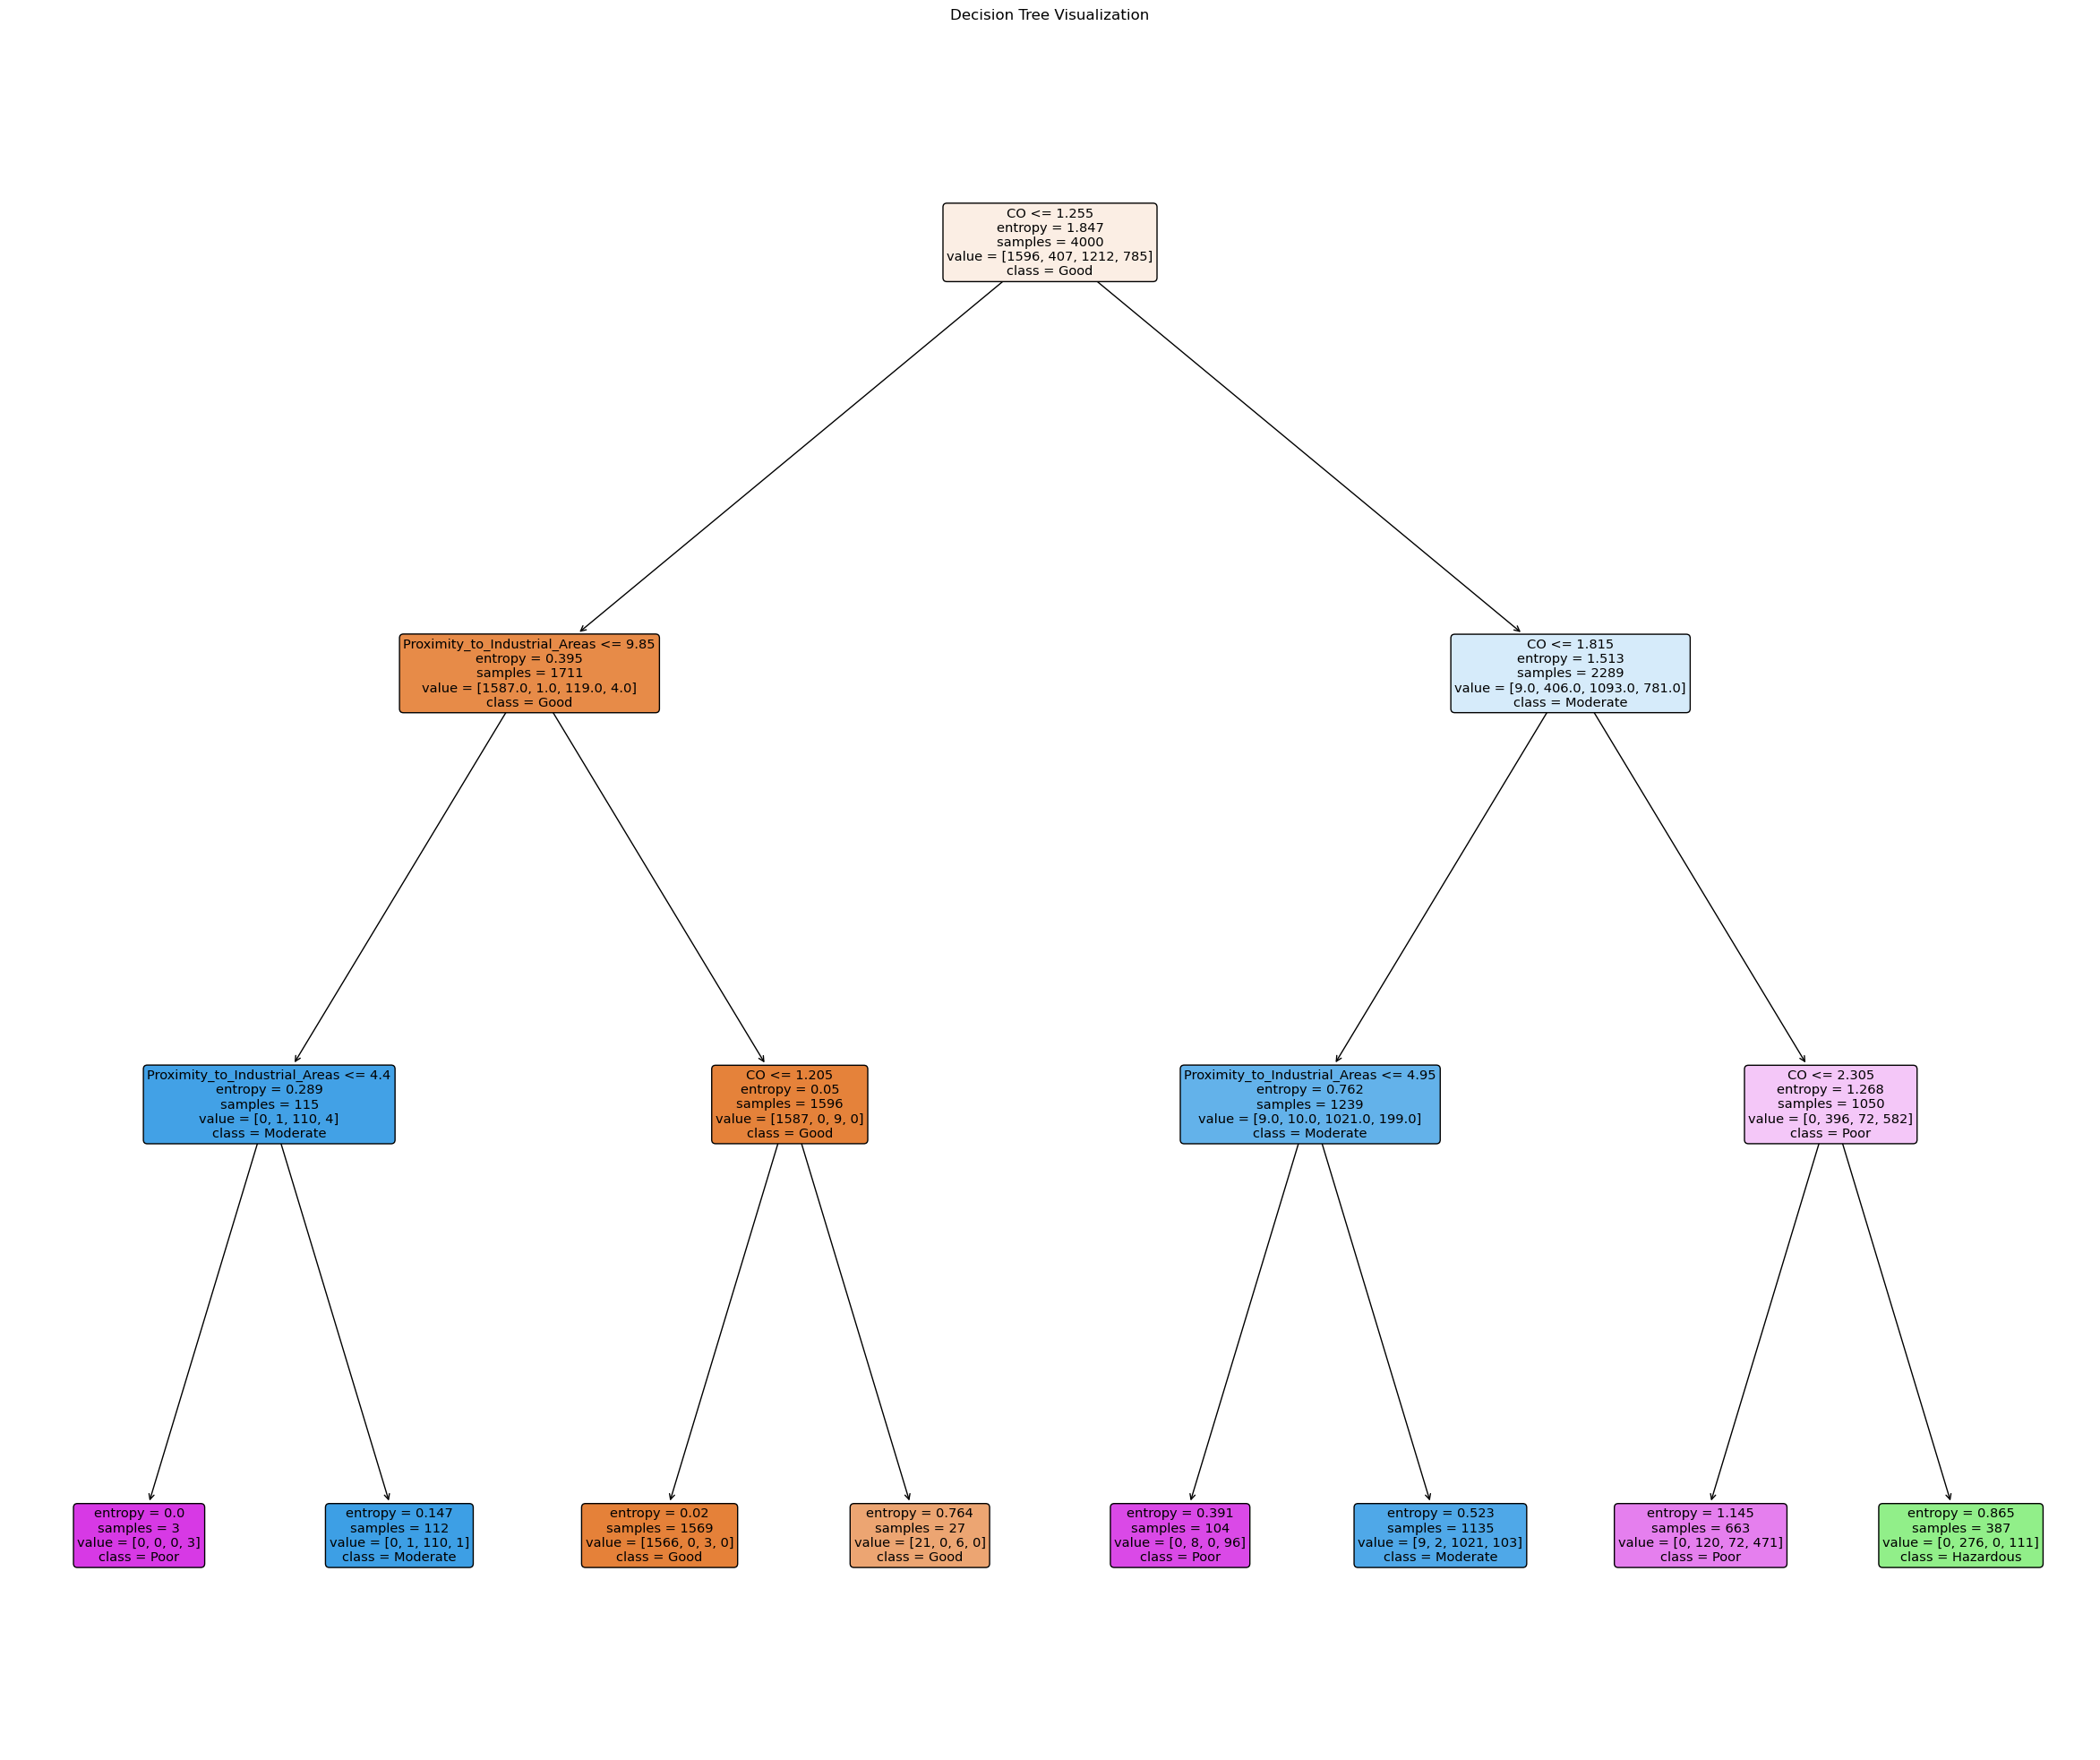

In [18]:
plt.figure(figsize=(30, 25))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=lb.classes_, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

In [19]:
y_pred = clf.predict(X_test)

In [20]:
k = 5
cv_scores = cross_val_score(clf,X,y,cv = k)

In [21]:
cv_scores

array([0.888, 0.876, 0.894, 0.875, 0.87 ])

In [22]:
cv_scores.mean()

0.8805999999999999

In [23]:
cv_scores.std()

0.008935323161475479

In [24]:
cv_scores.max()

0.894

In [25]:
cv_scores.min()

0.87

In [26]:
param_grid = { 
             'criterion':['gini','entropy'], 
              'max_depth': [None,3,5,10],
              'min_samples_split': [2, 5, 10], 
              'min_samples_leaf': [1, 2, 5, 10], 
               }

In [27]:
grid_search = GridSearchCV(estimator = clf,param_grid = param_grid,cv = 5,scoring ='accuracy')

In [28]:
grid_search

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [29]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [30]:
best_params = grid_search.best_params_

In [31]:
best_params

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [32]:
best_clf = DecisionTreeClassifier(**best_params)

In [33]:
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5)

In [34]:
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5)

In [35]:
y_pred_1 = best_clf.predict(X_test)

In [36]:
y_pred_1

array([0, 0, 3, 0, 3, 0, 0, 1, 2, 2, 1, 0, 2, 2, 3, 2, 0, 0, 3, 2, 1, 2,
       1, 3, 3, 0, 0, 0, 2, 0, 1, 0, 2, 1, 3, 0, 2, 2, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 2, 2, 3, 0, 3, 2, 0, 3, 3, 0, 3, 0, 0, 3, 2, 3, 1, 1, 3,
       0, 0, 2, 2, 3, 2, 0, 2, 0, 0, 1, 2, 0, 1, 3, 3, 2, 2, 2, 2, 2, 0,
       0, 3, 3, 0, 0, 0, 3, 3, 0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 1, 3, 2, 0,
       1, 0, 3, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 3, 2, 1, 0, 2, 0, 2, 0,
       1, 1, 0, 3, 0, 0, 3, 2, 3, 2, 0, 3, 0, 2, 3, 2, 1, 2, 3, 2, 0, 2,
       2, 2, 0, 2, 0, 0, 2, 3, 0, 2, 2, 1, 2, 0, 0, 2, 0, 0, 1, 0, 2, 3,
       0, 0, 2, 0, 3, 2, 0, 1, 3, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 3, 3, 0,
       2, 0, 0, 0, 0, 2, 3, 1, 2, 0, 1, 3, 3, 0, 3, 3, 2, 0, 2, 3, 2, 1,
       2, 0, 2, 0, 0, 2, 0, 3, 0, 0, 3, 0, 2, 2, 2, 3, 0, 3, 0, 2, 0, 2,
       0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 3, 0, 1, 2, 3, 3, 2, 3, 0, 2,
       0, 0, 3, 0, 0, 3, 2, 3, 0, 1, 0, 0, 3, 1, 2, 2, 1, 3, 0, 0, 2, 3,
       2, 2, 0, 3, 2, 0, 2, 0, 3, 0, 3, 0, 2, 0, 3,

In [99]:
Accuracy  = accuracy_score(y_test,y_pred)

In [101]:
Accuracy

0.893

In [39]:
accuracy_score(y_train, best_clf.predict(X_train))

0.97325

In [40]:
best_clf.feature_importances_

array([0.02549301, 0.02273921, 0.00303927, 0.00832251, 0.03364584,
       0.02626508, 0.69525483, 0.1726014 , 0.01263885])

In [41]:
feat_df = pd.DataFrame({'Columns' : X.columns, 'feature_importances' : best_clf.feature_importances_ *100})

In [42]:
feat_df

,Columns,feature_importances
0,Temperature,2.549301
1,Humidity,2.273921
2,PM2.5,0.303927
3,PM10,0.832251
4,NO2,3.364584
5,SO2,2.626508
6,CO,69.525483
7,Proximity_to_Industrial_Areas,17.260140
8,Population_Density,1.263885


In [43]:
feat_df.sort_values(by = 'feature_importances', ascending=False)

,Columns,feature_importances
6,CO,69.525483
7,Proximity_to_Industrial_Areas,17.260140
4,NO2,3.364584
5,SO2,2.626508
0,Temperature,2.549301
1,Humidity,2.273921
8,Population_Density,1.263885
3,PM10,0.832251
2,PM2.5,0.303927


In [44]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred,target_names=lb.classes_))


Classification Report:
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       404
   Hazardous       0.62      0.66      0.64        93
    Moderate       0.91      0.96      0.94       288
        Poor       0.78      0.71      0.74       215

    accuracy                           0.89      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.89      0.89      0.89      1000



In [45]:
confusion_matrix(y_test, y_pred)

array([[404,   0,   0,   0],
       [  0,  61,   0,  32],
       [  2,   0, 276,  10],
       [  0,  37,  26, 152]], dtype=int64)

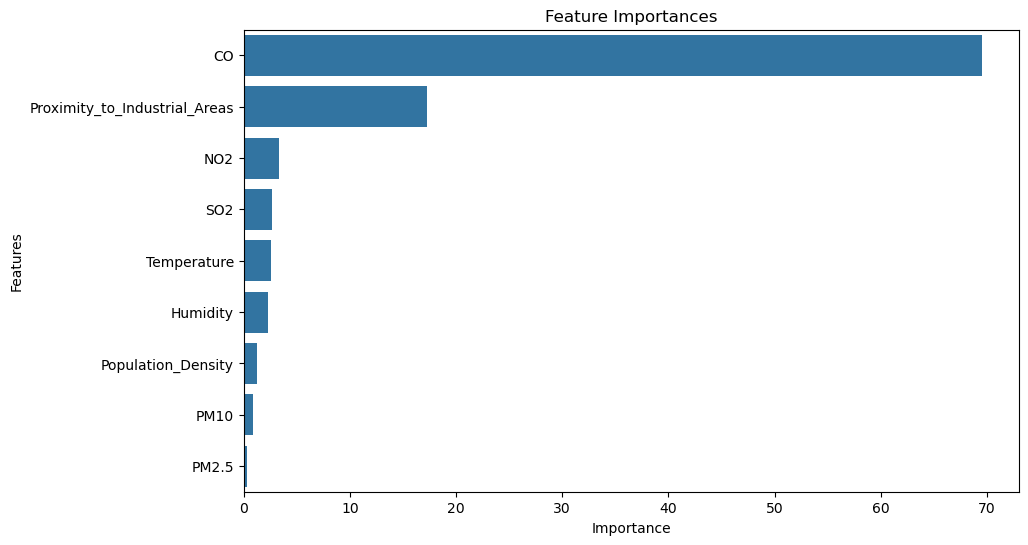

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(x='feature_importances', y='Columns', data=feat_df.sort_values(by='feature_importances', ascending=False))
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


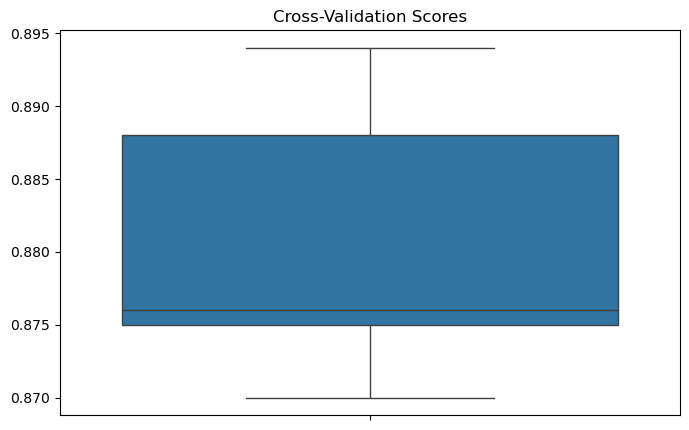

In [47]:
plt.figure(figsize=(8, 5))
sns.boxplot(cv_scores)
plt.title('Cross-Validation Scores')
plt.show()


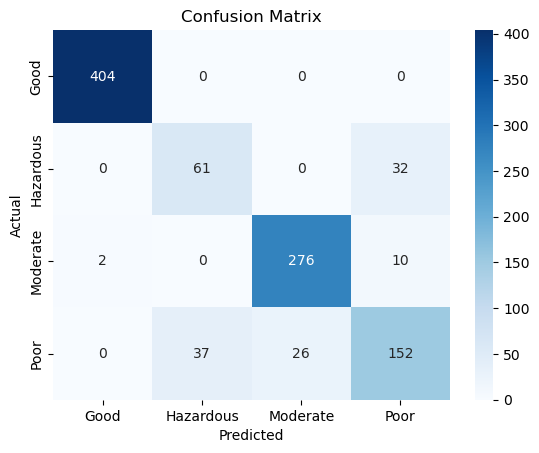

In [48]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


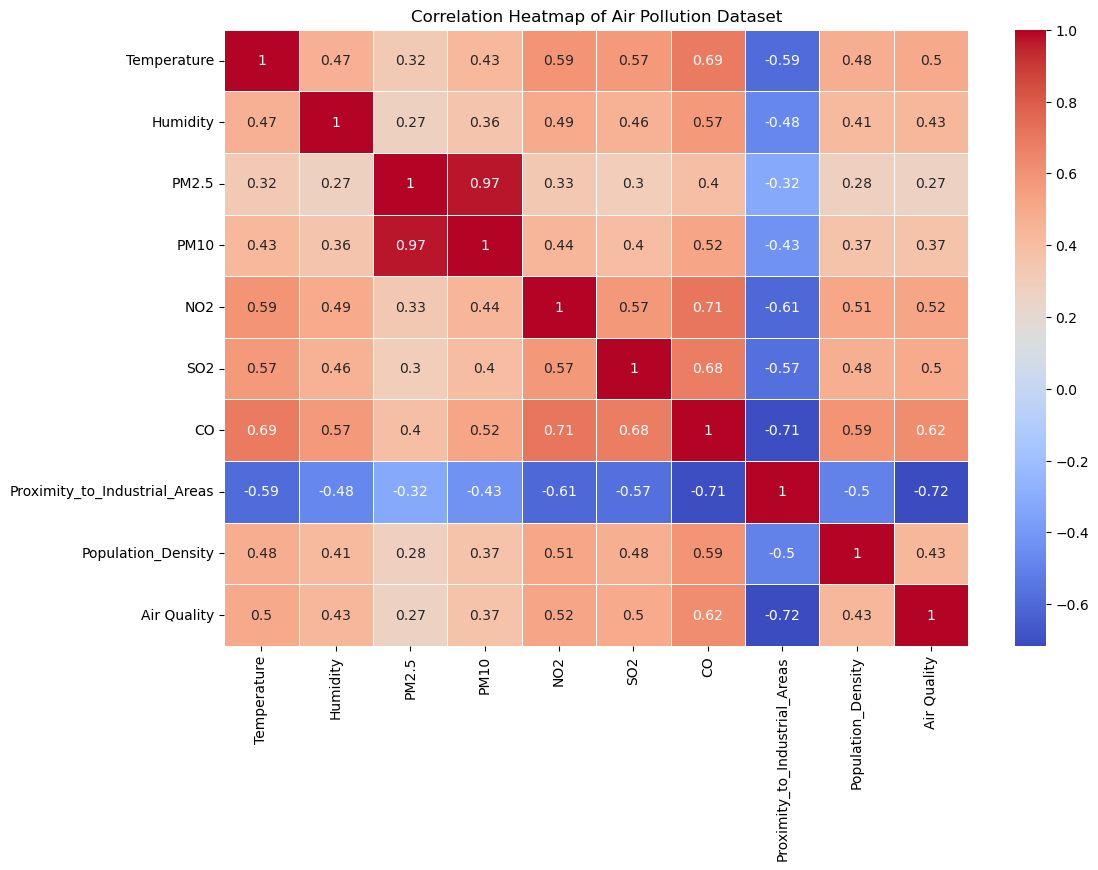

In [49]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap of Air Pollution Dataset')
plt.show()
